<a href="https://colab.research.google.com/github/HwangHanJae/datascience-learningnote-titanic/blob/main/seaborn_lmplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

In [1]:
#라이브러리 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats

In [2]:
#그래프가 잘보이게 하기 위해 'ggplot' 스타일을 사용
plt.style.use('ggplot')
#폰트가 선명하게 보이게 하기위하여
set_matplotlib_formats('svg')

###lmplot(회귀선+플롯)
- 회귀 모델을 플로팅
- regplot()과 FacetGrid 를 결합

###lmplot 실습에 사용할 데이터
- tips
 - total_bill(float64) : 최종 금액
 - tip(float64) : 팁
 - sex(category) : 성별
 - smoker(category) : 흡연자/비흡연자
 - day(category) : 요일(Sun/Sat/Thur/Fri)
 - time(category) : 시간(Dinner/Lunch)
 - size(int64) : 인원(1~6)


####tips

In [3]:
#데이터 로드하기
tips = sns.load_dataset('tips')

In [4]:
#데이터 정보
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
#데이터 수치적 요약
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
#데이터 범주적 요약
tips.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


###그래프 확인

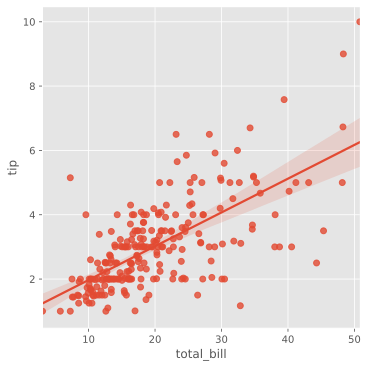

In [7]:
#x축 : total_bill(float), y축 : tip(float) 둘의 상관관계를 분석
sns.lmplot(x='total_bill', data=tips, y='tip')

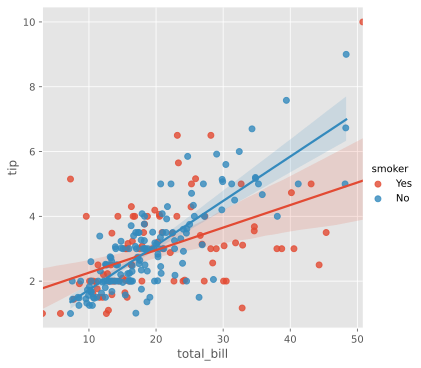

In [8]:
#hue 옵션을 사용하여 smoker 특성을 다른 색상으로 표현
sns.lmplot(x='total_bill', y='tip', hue='smoker',data=tips)

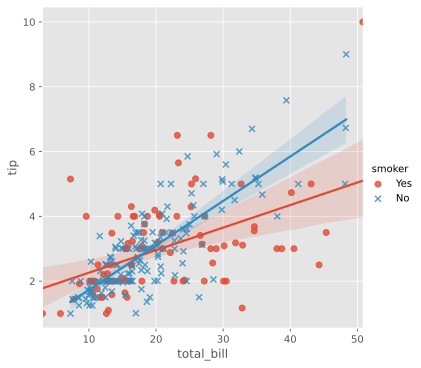

In [9]:
#markers=['o','x'] 옵션 사용
sns.lmplot(x='total_bill', y='tip', data=tips, hue='smoker',
           markers=['o','x'])

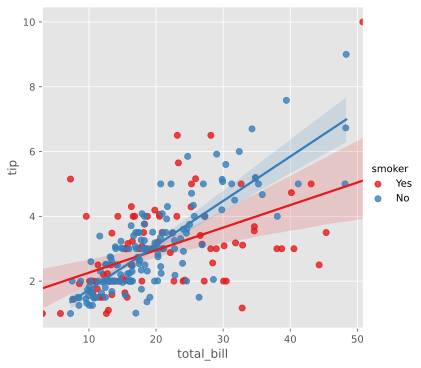

In [10]:
#palette='Set1' 옵션 사용
sns.lmplot(x='total_bill', y='tip', data=tips, hue='smoker',
           palette="Set1")

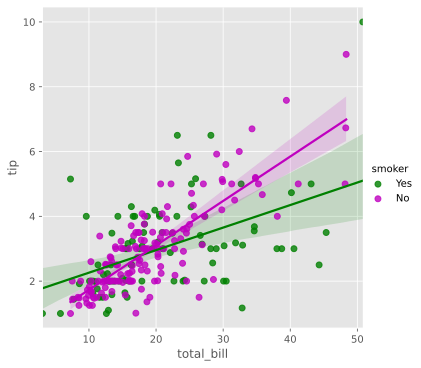

In [20]:
#palette 옵션으로 hue 색 변경

sns.lmplot(x='total_bill', y='tip', hue='smoker',data=tips,
           palette=dict(Yes="g",No="m"))

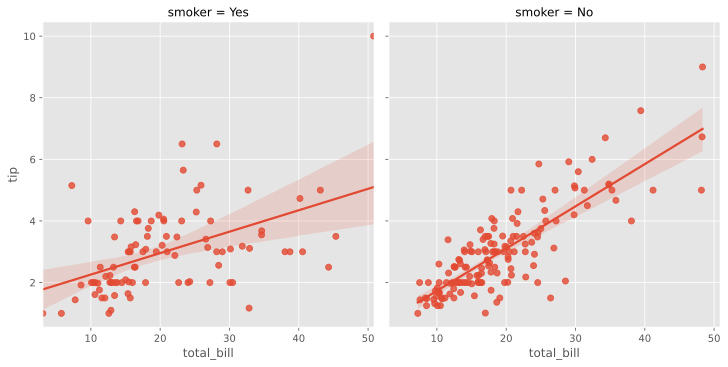

In [21]:
#col 옵션 사용
sns.lmplot(x='total_bill',y='tip',col='smoker',data=tips)

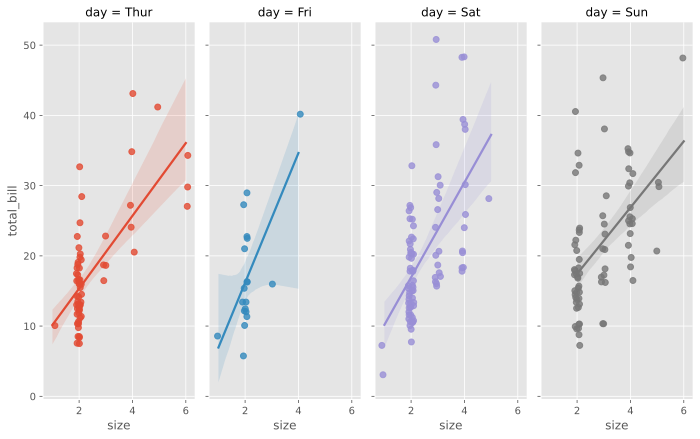

In [29]:
#col, height, aspect, x_jitter 옵션 사용
sns.lmplot(x='size', y='total_bill',hue='day',col='day',data=tips,
           height=6, aspect=.4, x_jitter=.1)

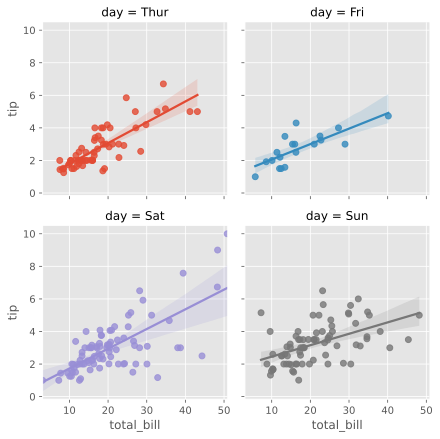

In [30]:
#col_wrap 옵션 사용
sns.lmplot(x='total_bill',y='tip',col='day',hue='day',data=tips,
           col_wrap=2, height=3)

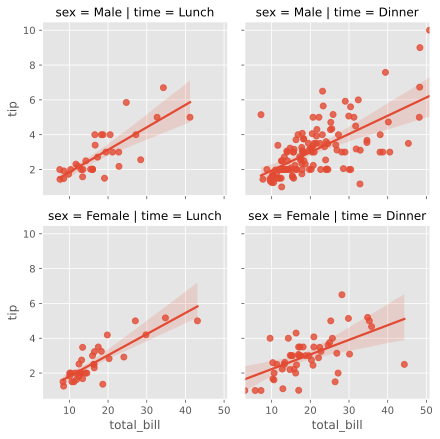

In [31]:
#row 옵션 사용
sns.lmplot(x='total_bill', y='tip', data=tips, row='sex',col='time',height=3)

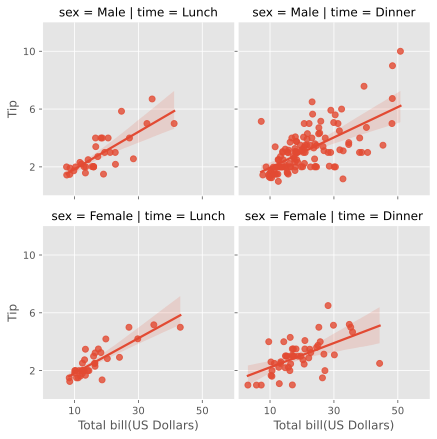

In [40]:
g = sns.lmplot(x='total_bill',y='tip', row='sex', col='time',data=tips, height=3)
g.set_xlabels("Total bill(US Dollars)")
g.set_ylabels("Tip")
g.set(xlim=(0,60), ylim=(0,12), xticks=[10,30,50], yticks=[2,6,10])
g.fig.subplots_adjust(wspace=.02)